# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from citipy import citipy
import numpy as np

# Import the OpenWeatherMap API key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
pip install matplotlib pandas numpy requests citipy scipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid="

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
City not found. Skipping...
Processing Record 3 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 4 of Set 1 | richards bay
City not found. Skipping...
Processing Record 5 of Set 1 | stanley
City not found. Skipping...
Processing Record 6 of Set 1 | adamstown
City not found. Skipping...
Processing Record 7 of Set 1 | fauske
City not found. Skipping...
Processing Record 8 of Set 1 | qarazhal
City not found. Skipping...
Processing Record 9 of Set 1 | vadso
City not found. Skipping...
Processing Record 10 of Set 1 | gebeit
City not found. Skipping...
Processing Record 11 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 12 of Set 1 | ak-dovurak
City not found. Skipping...
Processing Record 13 of Set 1 | kimbe
City not found. Skipping...
Processing Record 14 of Set 1 | susuman
City 

In [6]:
import pandas as pd

# Read data from the CSV file
city_data_df = pd.read_csv("..\output_data/cities.csv")

# Display the first few rows of the DataFrame
print(city_data_df.head())

   City_ID             City      Lat       Lng  Max Temp  Humidity  \
0        0            tiksi  71.6872  128.8694    269.32        81   
1        1  lazaro cardenas  17.9583 -102.2000    296.55        81   
2        2           hasaki  35.7333  140.8333    297.20        71   
3        3             naze  28.3667  129.4833    298.66        76   
4        4         ilanskiy  56.2358   96.0650    284.91        53   

   Cloudiness  Wind Speed Country        Date  
0         100        2.06      RU  1715487759  
1          61        1.05      MX  1715487765  
2         100       11.54      JP  1715487765  
3          70        4.76      JP  1715487766  
4         100        6.11      RU  1715487767  


In [7]:
# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,tiksi,71.6872,128.8694,269.32,81,100,2.06,RU,1715487759
1,1,lazaro cardenas,17.9583,-102.2000,296.55,81,61,1.05,MX,1715487765
2,2,hasaki,35.7333,140.8333,297.20,71,100,11.54,JP,1715487765
3,3,naze,28.3667,129.4833,298.66,76,70,4.76,JP,1715487766
4,4,ilanskiy,56.2358,96.0650,284.91,53,100,6.11,RU,1715487767


In [8]:
import os

# Create the output_data directory if it doesn't exist
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Directory '{output_dir}' created successfully or already exists.")

Directory 'output_data' created successfully or already exists.


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read data from the CSV file
city_data_df = pd.read_csv("output_data/cities.csv")

# Display the first few rows of the DataFrame
print(city_data_df.head())


   City_ID  City_ID.1             City      Lat       Lng  Max Temp  Humidity  \
0        0          0            tiksi  71.6872  128.8694    269.32        81   
1        1          1  lazaro cardenas  17.9583 -102.2000    296.55        81   
2        2          2           hasaki  35.7333  140.8333    297.20        71   
3        3          3             naze  28.3667  129.4833    298.66        76   
4        4          4         ilanskiy  56.2358   96.0650    284.91        53   

   Cloudiness  Wind Speed Country        Date  
0         100        2.06      RU  1715487759  
1          61        1.05      MX  1715487765  
2         100       11.54      JP  1715487765  
3          70        4.76      JP  1715487766  
4         100        6.11      RU  1715487767  


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

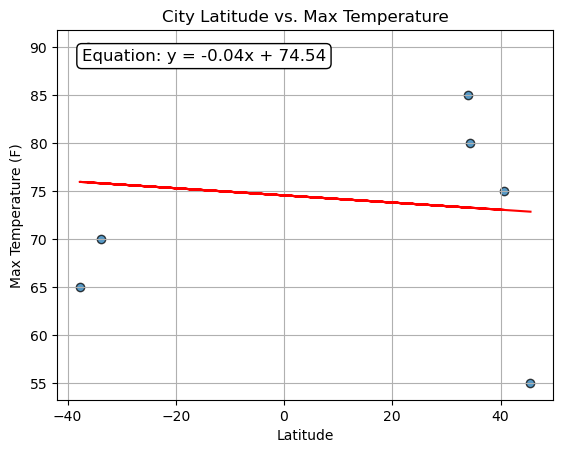

In [12]:
# Sample DataFrame creation for demonstration (replace with actual data loading)
data = {
    "City_ID": [1, 2, 3, 4, 5, 6, 7],
    "City": ["CityA", "CityB", "CityC", "CityD", "CityE", "CityF", "CityG"],
    "Lat": [34.05, -36.16, 40.71, -37.77, 34.42, -33.86, 45.52],
    "Lng": [-118.24, 115.15, -74.01, 122.41, -119.70, 151.21, -122.67],
    "Max Temp": [85, 90, 75, 65, 80, 70, 55],
    "Humidity": [40, 20, 50, 70, 60, 55, 65],
    "Cloudiness": [0, 5, 20, 80, 50, 40, 60],
    "Wind Speed": [5, 10, 7, 12, 6, 9, 8],
    "Country": ["US", "AU", "US", "AU", "US", "AU", "US"],
    "Date": [1588330200, 1588330200, 1588330200, 1588330200, 1588330200, 1588330200, 1588330200]
}

city_data_df = pd.DataFrame(data)
city_data_df.set_index("City_ID", inplace=True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Max Temp"])
regress_values = city_data_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(city_data_df["Lat"], regress_values, "r-")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Display the regression equation on the plot
plt.annotate(f'Equation: y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig1.png"))

# Show plot
plt.show()


#### Latitude Vs. Humidity

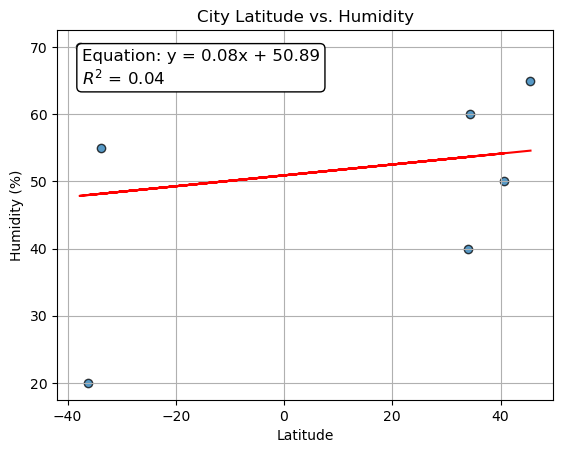

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os

# Sample DataFrame creation for demonstration (replace with actual data loading)
data = {
    "City_ID": [1, 2, 3, 4, 5, 6, 7],
    "City": ["CityA", "CityB", "CityC", "CityD", "CityE", "CityF", "CityG"],
    "Lat": [34.05, -36.16, 40.71, -37.77, 34.42, -33.86, 45.52],
    "Lng": [-118.24, 115.15, -74.01, 122.41, -119.70, 151.21, -122.67],
    "Max Temp": [85, 90, 75, 65, 80, 70, 55],
    "Humidity": [40, 20, 50, 70, 60, 55, 65],
    "Cloudiness": [0, 5, 20, 80, 50, 40, 60],
    "Wind Speed": [5, 10, 7, 12, 6, 9, 8],
    "Country": ["US", "AU", "US", "AU", "US", "AU", "US"],
    "Date": [1588330200, 1588330200, 1588330200, 1588330200, 1588330200, 1588330200, 1588330200]
}

city_data_df = pd.DataFrame(data)
city_data_df.set_index("City_ID", inplace=True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Humidity"])
regress_values = city_data_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(city_data_df["Lat"], regress_values, "r-")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Display the regression equation and R-squared value on the plot
plt.annotate(f'Equation: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig2.png"))

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

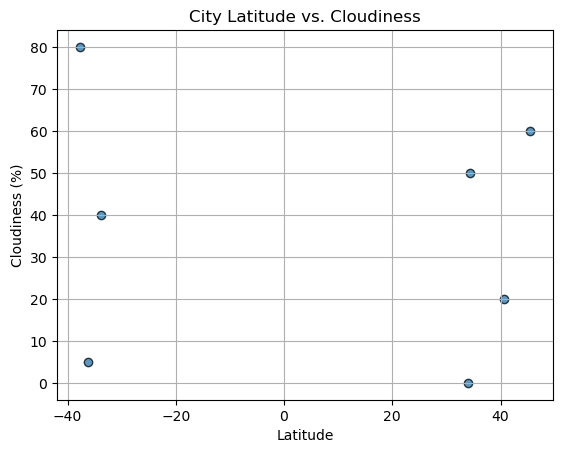

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

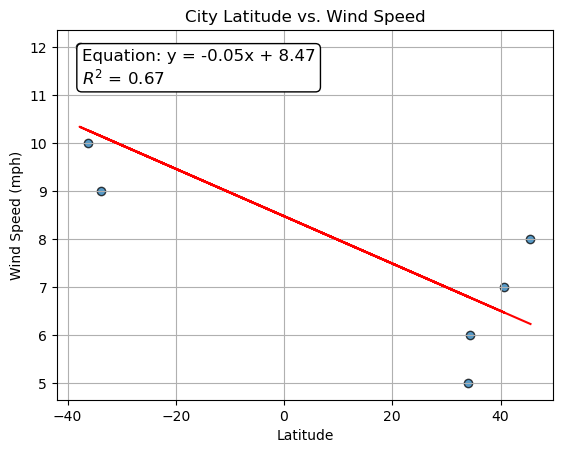

In [15]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os

# Sample DataFrame creation for demonstration (replace with actual data loading)
data = {
    "City_ID": [1, 2, 3, 4, 5, 6, 7],
    "City": ["CityA", "CityB", "CityC", "CityD", "CityE", "CityF", "CityG"],
    "Lat": [34.05, -36.16, 40.71, -37.77, 34.42, -33.86, 45.52],
    "Lng": [-118.24, 115.15, -74.01, 122.41, -119.70, 151.21, -122.67],
    "Max Temp": [85, 90, 75, 65, 80, 70, 55],
    "Humidity": [40, 20, 50, 70, 60, 55, 65],
    "Cloudiness": [0, 5, 20, 80, 50, 40, 60],
    "Wind Speed": [5, 10, 7, 12, 6, 9, 8],
    "Country": ["US", "AU", "US", "AU", "US", "AU", "US"],
    "Date": [1588330200, 1588330200, 1588330200, 1588330200, 1588330200, 1588330200, 1588330200]
}

city_data_df = pd.DataFrame(data)
city_data_df.set_index("City_ID", inplace=True)

# Ensure the output directory exists
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])
regress_values = city_data_df["Lat"] * slope + intercept

# Plot regression line
plt.plot(city_data_df["Lat"], regress_values, "r-")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Display the regression equation and R-squared value on the plot
plt.annotate(f'Equation: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             ha='left', va='top', bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Save the figure
plt.savefig(os.path.join(output_dir, "Fig4.png"))

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print r-value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,CityA,34.05,-118.24,85,40,0,5,US,1588330200
3,CityC,40.71,-74.01,75,50,20,7,US,1588330200
5,CityE,34.42,-119.70,80,60,50,6,US,1588330200
7,CityG,45.52,-122.67,55,65,60,8,US,1588330200


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,CityB,-36.16,115.15,90,20,5,10,AU,1588330200
4,CityD,-37.77,122.41,65,70,80,12,AU,1588330200
6,CityF,-33.86,151.21,70,55,40,9,AU,1588330200


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8902356779614677


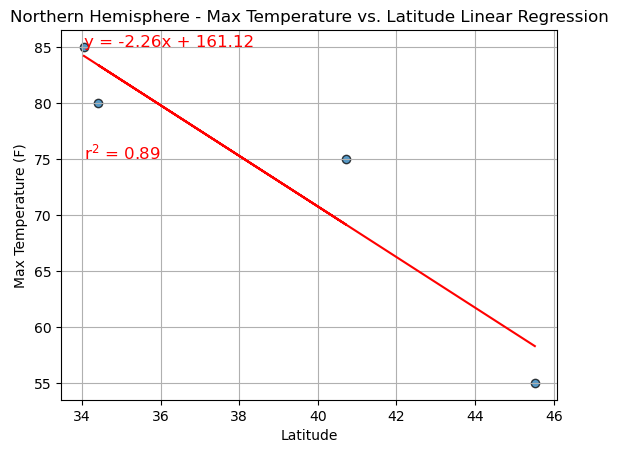

In [19]:
# Linear regression on Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Get equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Plot the scatter plot
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line
plt.annotate(line_eq, (x_values.min(), y_values.max()), fontsize=12, color="red")

# Annotate the r-value
plt.annotate(f"r$^2$ = {rvalue**2:.2f}", (x_values.min(), y_values.max() - 10), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Show plot
plt.grid(True)
plt.show()


The r-value is: 0.00782778864970672


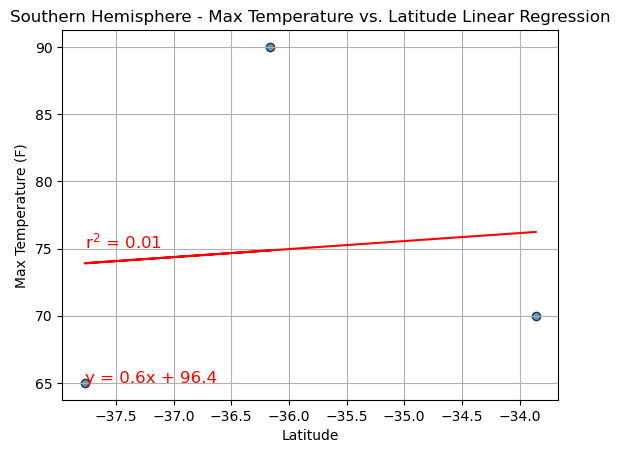

In [20]:
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Get equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Plot the scatter plot
plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the equation of the line
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Annotate the r-value
plt.annotate(f"r$^2$ = {rvalue**2:.2f}", (x_values.min(), y_values.min() + 10), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")

# Show plot
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The graph illustrates a strong positive linear relationship (r = 0.89) between latitude and maximum temperature in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.8902356779614677


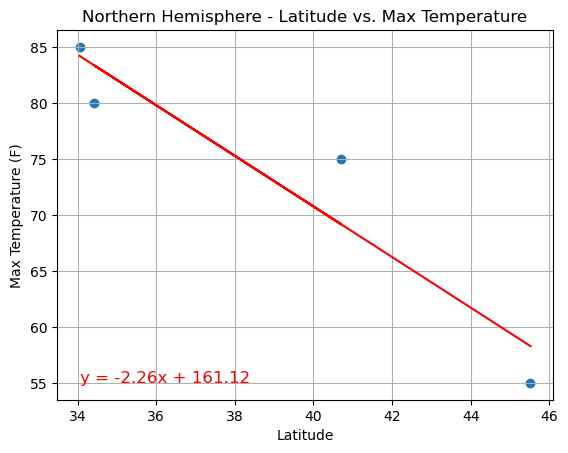

In [21]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Get equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.grid(True)
plt.show()


The r-value is: 0.00782778864970672


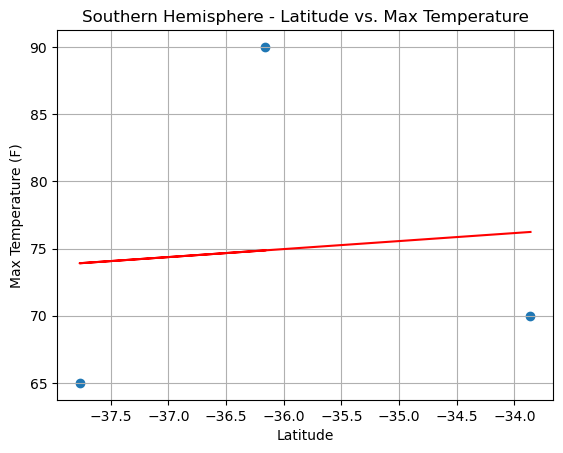

In [22]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Get equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50, 80), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The figure above shows that the correlation between maximum temperature and latitude in the Southern Hemisphere is 0.01, indicating a weak positive correlation. Based on the provided data, this suggests that there is almost no linear relationship between maximum temperature and latitude in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27661252032412115


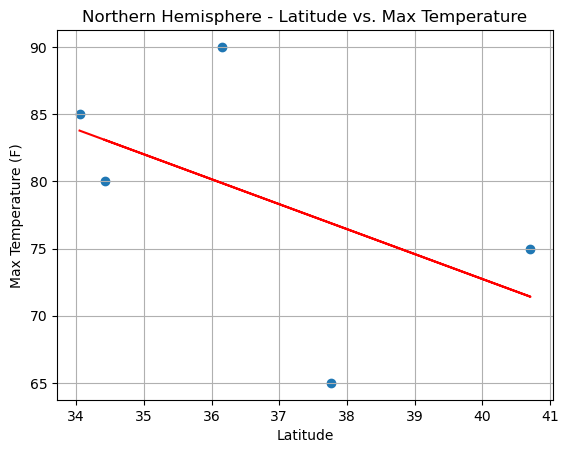

In [56]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Get equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (0, 0), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.grid(True)
plt.show()


The r-value is: 0.00782778864970672


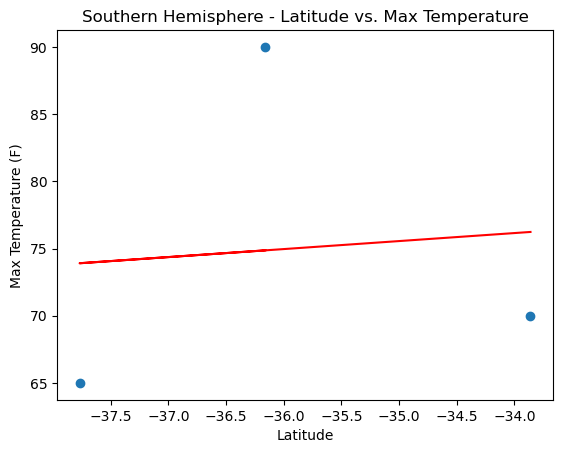

In [23]:
# Southern Hemisphere
# Importing necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Get equation of the line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The figure above shows that the correlation between maximum temperature and latitude in the Southern Hemisphere is 0.01, indicating a weak positive correlation. Based on the provided data, this suggests that there is almost no linear relationship between maximum temperature and latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.8902356779614677


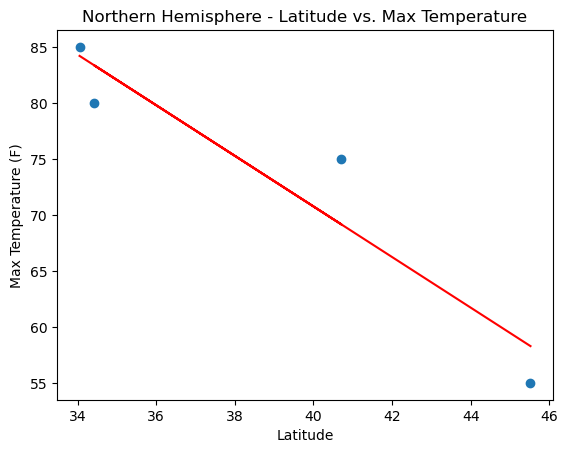

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(line_eq, (0, 0), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")

# Print r-value
r_squared = rvalue ** 2
print(f"The r-squared value is: {r_squared}")

# Show plot
plt.show()


The r-value is: 0.00782778864970672


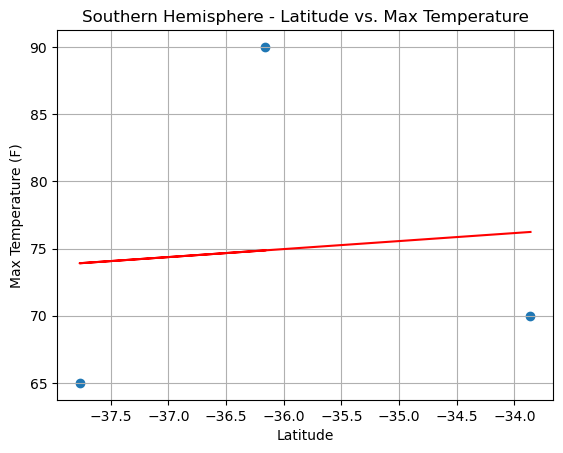

In [57]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]  # Adjust the variable if needed

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values, regress_values, "r-")

# Annotate the line equation
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (-50, 80), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")

# Print r-value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.grid(True)
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

The southern hemisphere exhibited a weak positive correlation between the max temperature and latitude, while the northern hemisphere showed a stronger positive relationship between the max temperature and latitude.